In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [49]:
x_train[0].shape

(28, 28)

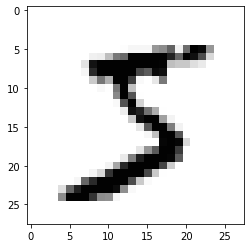

In [50]:
plt.imshow(x_train[0], cmap = 'Greys')

In [51]:
x_train_vec = x_train.reshape(60000, 28 * 28)
x_test_vec = x_test.reshape(10000, 28 * 28)

In [52]:
y_train_oh = utils.to_categorical(y_train)
y_test_oh = utils.to_categorical(y_test)

In [ ]:
# DNN

In [30]:
model = Sequential()
model.add(Dense(112, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(56, activation = 'relu'))
model.add(Dense(28, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 112)               87920     
                                                                 
 dense_9 (Dense)             (None, 56)                6328      
                                                                 
 dense_10 (Dense)            (None, 28)                1596      
                                                                 
 dense_11 (Dense)            (None, 10)                290       
                                                                 
Total params: 96,134
Trainable params: 96,134
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [32]:
hist = model.fit(x_train_vec, y_train_oh, epochs = 30, batch_size = 20, validation_split=0.2)

Epoch 1/30
2400/2400 [==============================] - 3s 1ms/step - loss: 1.1189 - accuracy: 0.7321 - val_loss: 0.3977 - val_accuracy: 0.8898
Epoch 2/30
2400/2400 [==============================] - 3s 1ms/step - loss: 0.3226 - accuracy: 0.9141 - val_loss: 0.2317 - val_accuracy: 0.9390
Epoch 3/30
2400/2400 [==============================] - 3s 1ms/step - loss: 0.2239 - accuracy: 0.9405 - val_loss: 0.2124 - val_accuracy: 0.9412
Epoch 4/30
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1746 - accuracy: 0.9536 - val_loss: 0.2136 - val_accuracy: 0.9475
Epoch 5/30
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1430 - accuracy: 0.9614 - val_loss: 0.1647 - val_accuracy: 0.9574
Epoch 6/30
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1267 - accuracy: 0.9654 - val_loss: 0.1502 - val_accuracy: 0.9625
Epoch 7/30
2400/2400 [==============================] - 3s 1ms/step - loss: 0.1086 - accuracy: 0.9697 - val_loss: 0.1689 - val_accuracy:

In [33]:
model.evaluate(x_test_vec, y_test_oh)

313/313 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.9748


[0.21835021674633026, 0.9747999906539917]

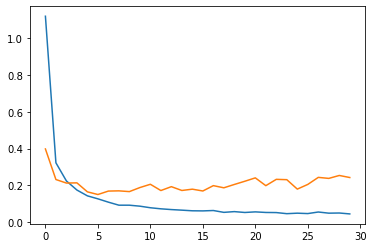

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

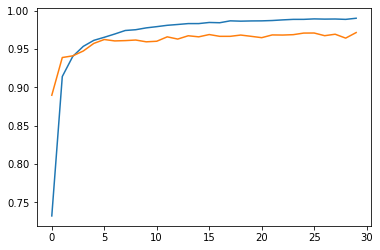

In [36]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [37]:
# CNN

In [38]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [57]:
x_train_cov = x_train.reshape(60000, 28, 28, 1)    # (data num, row num, col num, depth)
x_test_cov = x_test.reshape(10000, 28, 28, 1)

In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               1179776   
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                      

In [66]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [67]:
hist = model.fit(x_train_cov, y_train_oh, validation_split=0.2, epochs=10, batch_size = 20)

Epoch 1/10
2400/2400 [==============================] - 32s 13ms/step - loss: 0.3041 - accuracy: 0.9525 - val_loss: 0.0819 - val_accuracy: 0.9761
Epoch 2/10
2400/2400 [==============================] - 32s 13ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0766 - val_accuracy: 0.9764
Epoch 3/10
2400/2400 [==============================] - 32s 13ms/step - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0957 - val_accuracy: 0.9767
Epoch 4/10
2400/2400 [==============================] - 32s 13ms/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.0670 - val_accuracy: 0.9832
Epoch 5/10
2400/2400 [==============================] - 32s 13ms/step - loss: 0.0286 - accuracy: 0.9914 - val_loss: 0.0777 - val_accuracy: 0.9829
Epoch 6/10
2400/2400 [==============================] - 32s 13ms/step - loss: 0.0250 - accuracy: 0.9932 - val_loss: 0.0877 - val_accuracy: 0.9836
Epoch 7/10
2400/2400 [==============================] - 32s 13ms/step - loss: 0.0209 - accuracy: 0.9940 - val_loss: 0.1242 -

In [69]:
model.evaluate(x_test_cov, y_test_oh)

313/313 [==============================] - 2s 5ms/step - loss: 0.1363 - accuracy: 0.9811


[0.13631850481033325, 0.9811000227928162]